In [18]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('i4').getOrCreate()

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import sys
%matplotlib inline 
sns.set(font_scale=1.5,style="white")

In [10]:
!pip install termcolor

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from termcolor import colored, cprint

In [78]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [21]:
df = spark.read.load('./test_scores.csv', format="csv", header="true")

In [13]:
df.show(3,False)

+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
|school|school_setting|school_type|classroom|teaching_method|n_student|student_id|gender|lunch           |pretest|posttest|
+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
|ANKYI |Urban         |Non-public |6OL      |Standard       |20.0     |2FHT3     |Female|Does not qualify|62.0   |72.0    |
|ANKYI |Urban         |Non-public |6OL      |Standard       |20.0     |3JIVH     |Female|Does not qualify|66.0   |79.0    |
|ANKYI |Urban         |Non-public |6OL      |Standard       |20.0     |3XOWE     |Male  |Does not qualify|64.0   |76.0    |
+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
only showing top 3 rows



In [16]:
print(df.dtypes)

school             object
school_setting     object
school_type        object
classroom          object
teaching_method    object
n_student          object
student_id         object
gender             object
lunch              object
pretest            object
posttest           object
dtype: object


In [22]:
df_col_list = df.select([i for i in df.columns if i not in 
                       {'student_id','pretest','posttest'}])
for i in df_col_list.columns:
    print(colored('--Showing-- Column --> {}'.format(i) ,'blue', attrs=['reverse', 'blink']))
    print('* number of unique value in',i)
    print(df.select(i).distinct().count())

--Showing-- Column --> school
* number of unique value in school
23
--Showing-- Column --> school_setting
* number of unique value in school_setting
3
--Showing-- Column --> school_type
* number of unique value in school_type
2
--Showing-- Column --> classroom
* number of unique value in classroom
97
--Showing-- Column --> teaching_method
* number of unique value in teaching_method
2
--Showing-- Column --> n_student
* number of unique value in n_student
18
--Showing-- Column --> gender
* number of unique value in gender
2
--Showing-- Column --> lunch
* number of unique value in lunch
2


In [24]:
df.columns

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'n_student',
 'student_id',
 'gender',
 'lunch',
 'pretest',
 'posttest']

In [23]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- school_setting: string (nullable = true)
 |-- school_type: string (nullable = true)
 |-- classroom: string (nullable = true)
 |-- teaching_method: string (nullable = true)
 |-- n_student: string (nullable = true)
 |-- student_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- pretest: string (nullable = true)
 |-- posttest: string (nullable = true)



In [15]:
sns.set_theme(style="darkgrid")
df = df.toPandas()
df.head()
corr_df = df.drop(['student_id'],1)
corr_df.head()

/tmp/ipykernel_1302/3474272276.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  corr_df = df.drop(['student_id'],1)


,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


In [25]:
col_list = ['school','school_setting','school_type','classroom','teaching_method','n_student'
            ,'gender','lunch','pretest','posttest']

for i in col_list:
    corr_df[i] = corr_df[i].astype('category').cat.codes
print(colored(' Show correlation between variables ', 'blue', attrs=['reverse', 'blink']))
corr_df.corr()

 Show correlation between variables 


,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
school,1.000000,-0.079447,0.330104,-0.050724,-0.041574,0.178557,-0.018751,0.002883,-0.113094,-0.101327
school_setting,-0.079447,1.000000,-0.083307,0.081313,0.082795,0.508018,-0.036581,0.025744,-0.123622,-0.157726
school_type,0.330104,-0.083307,1.000000,0.141215,0.153593,0.548190,0.017593,0.171196,-0.361180,-0.342585
classroom,-0.050724,0.081313,0.141215,1.000000,-0.016094,0.037150,0.005535,0.115873,-0.037016,-0.037899
teaching_method,-0.041574,0.082795,0.153593,-0.016094,1.000000,0.105900,-0.020087,0.017970,-0.115189,-0.288003
n_student,0.178557,0.508018,0.548190,0.037150,0.105900,1.000000,-0.019265,0.367018,-0.499263,-0.479270
gender,-0.018751,-0.036581,0.017593,0.005535,-0.020087,-0.019265,1.000000,-0.016134,0.005947,-0.002070
lunch,0.002883,0.025744,0.171196,0.115873,0.017970,0.367018,-0.016134,1.000000,-0.622526,-0.581788
pretest,-0.113094,-0.123622,-0.361180,-0.037016,-0.115189,-0.499263,0.005947,-0.622526,1.000000,0.909371
posttest,-0.101327,-0.157726,-0.342585,-0.037899,-0.288003,-0.479270,-0.002070,-0.581788,0.909371,1.000000


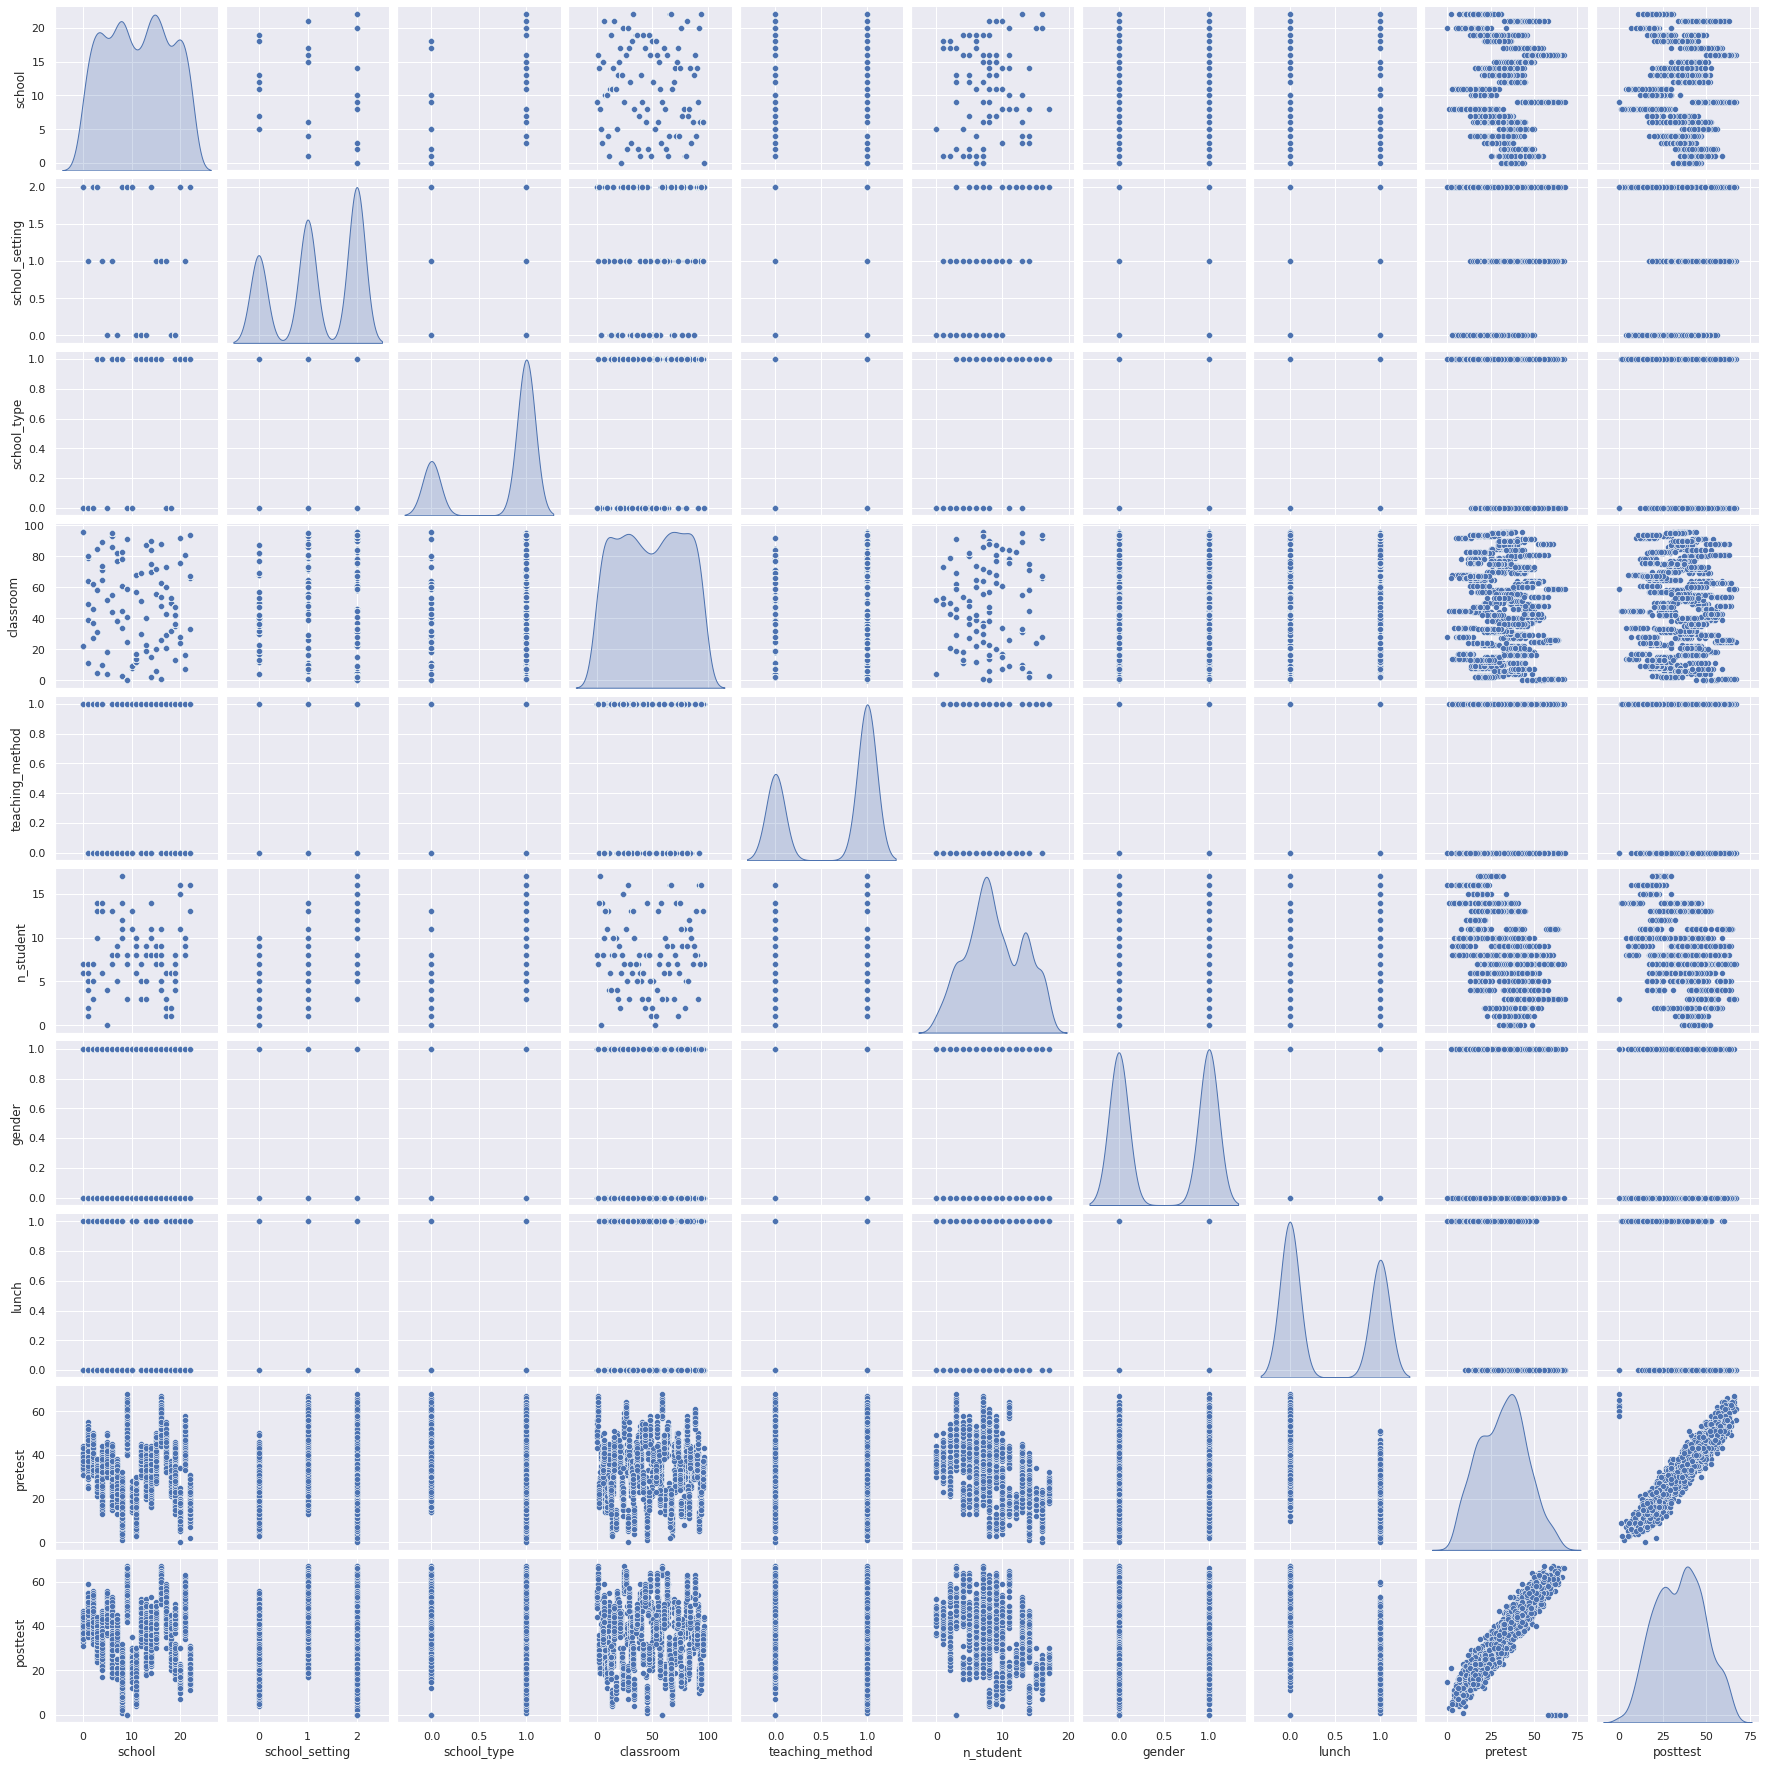

In [29]:
sns.pairplot(corr_df, diag_kind='kde')

In [27]:
df.na.drop().show()

+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
|school|school_setting|school_type|classroom|teaching_method|n_student|student_id|gender|           lunch|pretest|posttest|
+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     2FHT3|Female|Does not qualify|   62.0|    72.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     3JIVH|Female|Does not qualify|   66.0|    79.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     3XOWE|  Male|Does not qualify|   64.0|    76.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     556O0|Female|Does not qualify|   61.0|    77.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     74LOE|  Male|Does not qualify|   64.0|    76.0|
| ANKYI|

 Show correlation between variables - heatmap 


<AxesSubplot:>

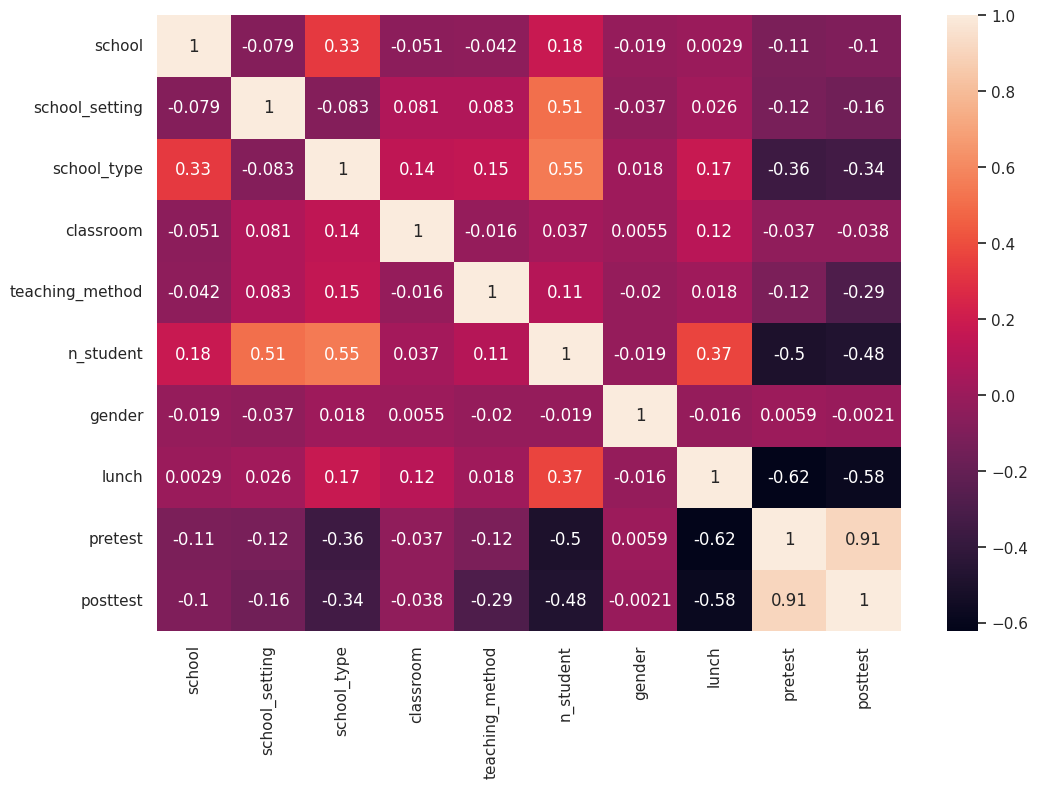

In [26]:
print(colored(' Show correlation between variables - heatmap ', 'blue', attrs=['reverse', 'blink']))

plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(),annot=True)

<AxesSubplot:xlabel='pretest', ylabel='count'>

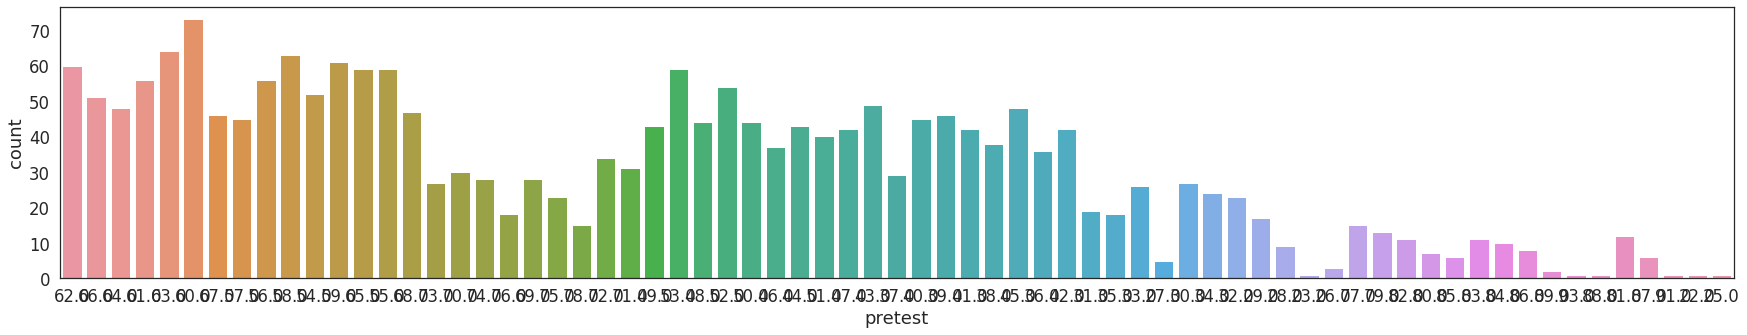

In [57]:
plt.figure(figsize=(30,5))
sns.countplot(data=df,x="pretest")

<AxesSubplot:xlabel='posttest', ylabel='count'>

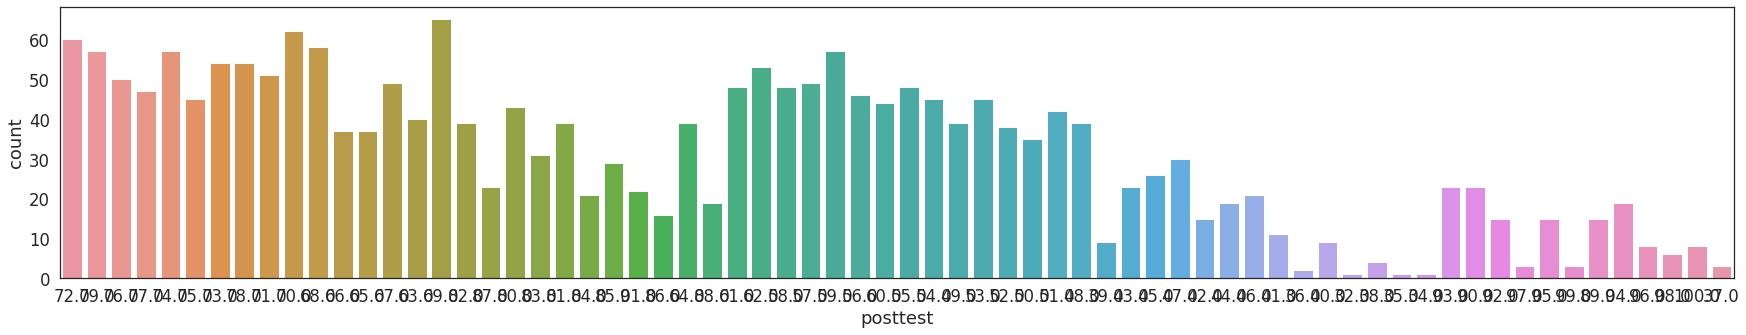

In [58]:
plt.figure(figsize=(30,5))
sns.countplot(data=df,x="posttest")

<AxesSubplot:xlabel='teaching_method', ylabel='count'>

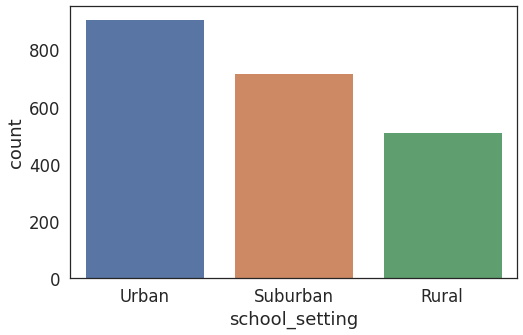

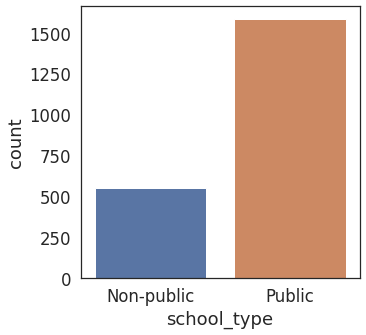

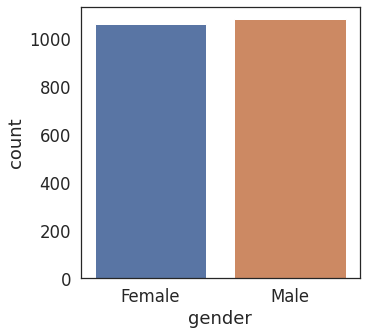

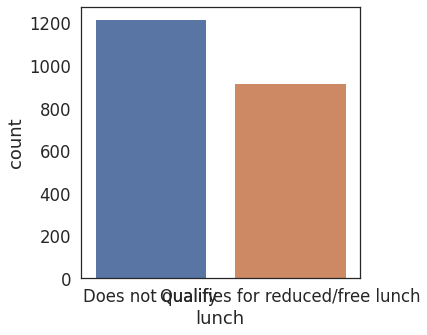

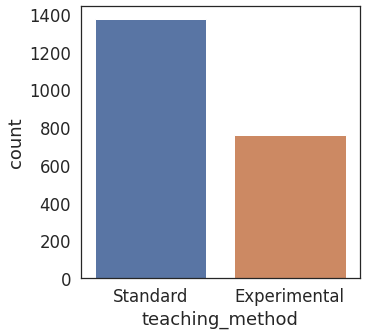

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="school_setting")
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="school_type")
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="gender")
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="lunch")
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="teaching_method")

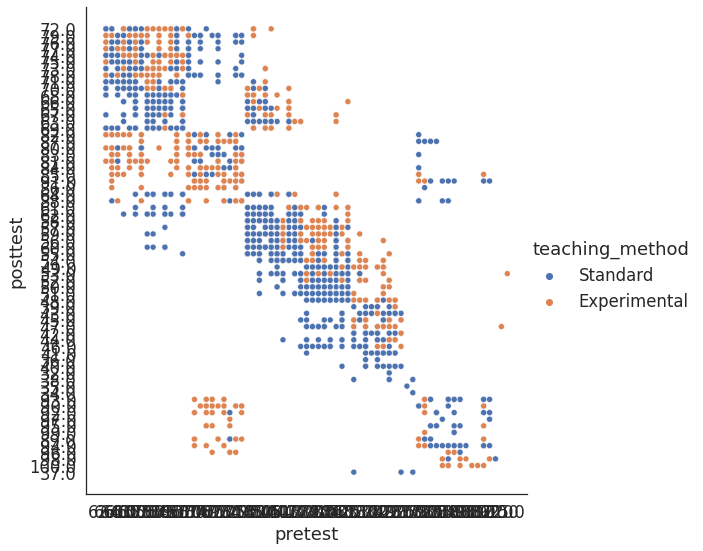

In [63]:
sns.relplot(x='pretest',y='posttest',data = df,hue ='teaching_method',height= 8)

In [64]:
lack=df.isnull()
lack_col = lack.any()
print(lack.sum())
print(df)
print(df.shape)

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64
     school school_setting school_type classroom teaching_method n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard      20.0   
1     ANKYI          Urban  Non-public       6OL        Standard      20.0   
2     ANKYI          Urban  Non-public       6OL        Standard      20.0   
3     ANKYI          Urban  Non-public       6OL        Standard      20.0   
4     ANKYI          Urban  Non-public       6OL        Standard      20.0   
...     ...            ...         ...       ...             ...       ...   
2128  ZOWMK          Urban      Public       ZBH        Standard      30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard      30.0   
2130  ZOWMK          Urban      Public       ZBH      

In [79]:
spark = SparkSession.builder.getOrCreate()

In [84]:
from pyspark.sql.types import StructField,IntegerType, StructType,StringType

In [87]:
df = df.withColumn("school_setting",df["school_setting"].cast("int"))

In [90]:
df = df.withColumn("teaching_method",df["teaching_method"].cast("int"))

In [91]:
df = df.withColumn("school_type",df["school_type"].cast("int"))

In [92]:
df = df.withColumn("lunch",df["lunch"].cast("int"))

In [93]:
df = df.withColumn("gender",df["gender"].cast("int"))

In [39]:
df.printSchema()

root
 |-- school: string (nullable = true)
 |-- school_setting: string (nullable = true)
 |-- school_type: string (nullable = true)
 |-- classroom: string (nullable = true)
 |-- teaching_method: string (nullable = true)
 |-- n_student: string (nullable = true)
 |-- student_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- lunch: string (nullable = true)
 |-- pretest: string (nullable = true)
 |-- posttest: string (nullable = true)



In [3]:
from imblearn.over_sampling import SMOTE

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy - LinearRegression: %.2f%%'%(lr.score(X_test,y_test)*100))

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [30]:
x = clean_df.drop(['posttest'],axis=1)
y = clean_df['posttest']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 111)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy - LinearRegression: %.2f%%'%(lr.score(X_test,y_test)*100))

Accuracy - LinearRegression: 96.23%


In [32]:
regr = RandomForestRegressor(max_depth=300, random_state=0, n_estimators=300)
regr.fit(X_train,y_train)

print('Accuracy - RandomForestRegression: %.2f%%'%(regr.score(X_test, y_test)*100))

Accuracy - RandomForestRegression: 96.30%


In [38]:
gradientBoost = GradientBoostingRegressor(random_state=123,learning_rate=0.03, n_estimators=300)
gradientBoost.fit(X_train,y_train)


print('Accuracy - GradientBoostingRegressor: %.2f%%'%(gradientBoost.score(X_test, y_test)*100))


Accuracy - GradientBoostingRegressor: 96.19%


In [35]:
ans = regr.predict(X_test)

In [36]:
final_output = pd.DataFrame(ans,columns={"pred_posttest"})
y_test_df = pd.DataFrame(y_test, index=None,columns={"posttest"}).reset_index(drop=True)
pd.concat([final_output,y_test_df],axis=1).to_csv('./predicttestscoreoutput.csv')

+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
|school|school_setting|school_type|classroom|teaching_method|n_student|student_id|gender|           lunch|pretest|posttest|
+------+--------------+-----------+---------+---------------+---------+----------+------+----------------+-------+--------+
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     2FHT3|Female|Does not qualify|   62.0|    72.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     3JIVH|Female|Does not qualify|   66.0|    79.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     3XOWE|  Male|Does not qualify|   64.0|    76.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     556O0|Female|Does not qualify|   61.0|    77.0|
| ANKYI|         Urban| Non-public|      6OL|       Standard|     20.0|     74LOE|  Male|Does not qualify|   64.0|    76.0|
| ANKYI|